<a href="https://colab.research.google.com/github/RaamnNoodlez99/COS711_A2/blob/main/COS711_A2_u20422475_Butt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [297]:
#Imports
import numpy as np
import random
import pandas as pd
from scipy import stats
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam, RMSprop
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [298]:
#Import dataset
url = 'https://raw.githubusercontent.com/RaamnNoodlez99/COS711_A2/refs/heads/main/Almond.csv'
df = pd.read_csv(url)
df = df.drop(df.columns[0], axis=1)

In [299]:
#Set seed
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [300]:
#Check for missing values
print(df.isnull().sum())
df['Type'] = df['Type'].map({'MAMRA': 0, 'SANORA': 1, 'REGULAR': 2})
non_numeric_columns = df.select_dtypes(include=['object', 'category']).columns
print(non_numeric_columns)
df = pd.get_dummies(df, columns=non_numeric_columns)
df.fillna(df.mean(), inplace=True)
print("")
print("missing values now: ")
print(df.isnull().sum())
df.head(400)

Length (major axis)          857
Width (minor axis)           942
Thickness (depth)           1004
Area                           0
Perimeter                      0
Roundness                    857
Solidity                       0
Compactness                    0
Aspect Ratio                1799
Eccentricity                1799
Extent                         0
Convex hull(convex area)       0
Type                           0
dtype: int64
Index([], dtype='object')

missing values now: 
Length (major axis)         0
Width (minor axis)          0
Thickness (depth)           0
Area                        0
Perimeter                   0
Roundness                   0
Solidity                    0
Compactness                 0
Aspect Ratio                0
Eccentricity                0
Extent                      0
Convex hull(convex area)    0
Type                        0
dtype: int64


,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,290.609274,227.940628,127.759132,22619.0,643.813269,0.470466,0.973384,1.458265,1.753216,0.813114,0.681193,23237.5,0
1,290.609274,234.188126,128.199509,23038.0,680.984841,0.470466,0.957304,1.601844,1.753216,0.813114,0.656353,24065.5,0
2,290.609274,229.418610,125.796547,22386.5,646.943212,0.470466,0.967270,1.487772,1.753216,0.813114,0.683620,23144.0,0
3,290.609274,232.763153,125.918808,22578.5,661.227483,0.470466,0.965512,1.540979,1.753216,0.813114,0.685360,23385.0,0
4,290.609274,230.150742,107.253448,19068.0,624.842706,0.470466,0.951450,1.629395,1.753216,0.813114,0.714800,20041.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,270.157867,171.025915,102.889503,21177.0,662.759447,0.369436,0.979057,1.650584,1.753216,0.813114,0.754973,21630.0,1
396,263.115662,171.025915,102.961578,20742.0,653.102593,0.381476,0.979528,1.636448,1.753216,0.813114,0.747621,21175.5,1
397,264.853943,171.025915,101.740959,20479.5,648.031524,0.371721,0.978359,1.631785,1.753216,0.813114,0.750990,20932.5,1
398,322.005554,171.025915,121.288589,29871.0,784.357426,0.366803,0.979682,1.638960,1.753216,0.813114,0.738942,30490.5,1


In [301]:
#Remove outliers
rows_before = df.shape[0]
print(f"Number of rows before removing outliers: {rows_before}")
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
threshold = 3
df_no_outliers = df[(z_scores < threshold).all(axis=1)]
rows_after = df_no_outliers.shape[0]
print(f"Number of rows after removing outliers: {rows_after}")
rows_removed = rows_before - rows_after
print(f"Number of rows removed: {rows_removed}")

Number of rows before removing outliers: 2803
Number of rows after removing outliers: 2515
Number of rows removed: 288


In [302]:
#Perform scaling
numeric_columns = df_no_outliers.select_dtypes(include=[np.number]).columns[:-1]
scaler = StandardScaler()
df_scaled = df_no_outliers.copy()
df_scaled[numeric_columns] = scaler.fit_transform(df_no_outliers[numeric_columns])
print("\nData after standardization (first 50 rows):")
df_scaled.head(400)


Data after standardization (first 50 rows):


,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,0.116941,2.660892,1.300423,-0.225202,-0.341480,-0.054256,0.408642,-0.483620,0.161107,0.109275,-1.211628,-0.248073,0
1,0.116941,2.947114,1.331344,-0.190522,-0.149508,-0.054256,-0.147614,-0.193508,0.161107,0.109275,-1.837359,-0.181335,0
2,0.116941,2.728604,1.162621,-0.244445,-0.325316,-0.054256,0.197155,-0.424000,0.161107,0.109275,-1.150482,-0.255610,0
3,0.116941,2.881831,1.171205,-0.228554,-0.251545,-0.054256,0.136336,-0.316490,0.161107,0.109275,-1.106646,-0.236185,0
4,0.116941,2.762146,-0.139378,-0.519105,-0.439454,-0.054256,-0.350145,-0.137840,0.161107,0.109275,-0.365023,-0.505718,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,0.982964,0.053407,1.551593,0.615955,2.177575,-0.958457,-1.961602,2.850406,0.161107,0.109275,-0.055590,0.799030,1
468,1.094619,0.053407,1.354772,0.648192,0.991173,-1.032115,-0.081579,0.512360,0.161107,0.109275,-0.190802,0.666318,1
469,1.282631,0.053407,1.584071,0.673064,1.828466,-1.190839,-1.964951,2.007982,0.161107,0.109275,-0.322587,0.860811,1
470,0.927020,0.053407,0.662599,0.401341,0.727417,-1.220497,0.114821,0.425116,0.161107,0.109275,-0.371756,0.400774,1


In [303]:
#Splitting dataset
train_df, temp_df = train_test_split(df_scaled, test_size=0.4, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.75, random_state=42)
print(f"Training set size: {train_df.shape[0]}")
print(f"Validation set size: {val_df.shape[0]}")
print(f"Testing set size: {test_df.shape[0]}")

Training set size: 1509
Validation set size: 251
Testing set size: 755


In [304]:
#Setting up for comparison between Adam and RProp
adam_accuracy_per_epoch = []
adam_loss_per_epoch = []
rprop_accuracy_per_epoch = []
rprop_loss_per_epoch = []

In [305]:
#Adam Training algorithm implementation
X = df_scaled.drop('Type', axis=1).values
y = df_scaled['Type'].values
num_folds = 3
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

accuracies = []
precisions = []
recalls = []

batch_sizes = [32, 64, 128]
learning_rates = [0.0001, 0.01, 0.1]
results_adam = []
results_rprop = []

def create_model(learning_rate, optimizer_type='adam'):
    model = Sequential()
    model.add(Input(shape=(12,)))
    model.add(Dense(24, activation='relu', kernel_initializer='random_normal'))
    model.add(Dense(32, activation='relu', kernel_initializer='random_normal'))
    model.add(Dense(3, activation='softmax'))

    if optimizer_type == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_type == 'rprop':
        optimizer = RMSprop(learning_rate=learning_rate)

    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

for optimizer_type in ['adam', 'rprop']:
    for batch_size, learning_rate in itertools.product(batch_sizes, learning_rates):
        accuracies_per_fold = []
        losses_per_fold = []
        print()
        print("--------------------------------------------------------------------------------")
        print(f"Training with batch size = {batch_size}, learning rate = {learning_rate}, optimizer = {optimizer_type}")
        accuracies = []
        for train_index, val_index in kf.split(X):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]

            model = create_model(learning_rate=learning_rate, optimizer_type=optimizer_type)
            history = model.fit(X_train, y_train, epochs=20, batch_size=batch_size, verbose=1)
            y_pred = np.argmax(model.predict(X_val), axis=1)

            acc = accuracy_score(y_val, y_pred)
            accuracies.append(acc)

            accuracies_per_fold.append(history.history['accuracy'])
            losses_per_fold.append(history.history['loss'])

        avg_accuracy = np.mean(accuracies)

        if optimizer_type == 'adam':
            results_adam.append((learning_rate, batch_size, avg_accuracy))
            avg_accuracies = np.mean(accuracies_per_fold, axis=0)
            adam_accuracy_per_epoch.append(avg_accuracies)
            avg_losses = np.mean(losses_per_fold, axis=0)
            adam_loss_per_epoch.append(avg_losses)
        elif optimizer_type == 'rprop':
            results_rprop.append((learning_rate, batch_size, avg_accuracy))
            avg_accuracies = np.mean(accuracies_per_fold, axis=0)
            rprop_accuracy_per_epoch.append(avg_accuracies)
            avg_losses = np.mean(losses_per_fold, axis=0)
            rprop_loss_per_epoch.append(avg_losses)

print("Results for Adam optimizer:", results_adam)
print("Results for RProp optimizer:", results_rprop)




--------------------------------------------------------------------------------
Training with batch size = 32, learning rate = 0.0001, optimizer = adam
Epoch 1/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3788 - loss: 1.0979
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4404 - loss: 1.0900
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4965 - loss: 1.0814
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5323 - loss: 1.0710
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5753 - loss: 1.0580
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5821 - loss: 1.0419
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5850 - loss: 1.0239
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5838 - loss: 1.0051
Epoch 9/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5890 - loss: 0.9863
Epoch 10/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5905 - loss: 0.9682
Epoch

In [306]:
# Print results for Adam optimizer
print("Results for Adam optimizer:")
for learning_rate, batch_size, avg_accuracy in results_adam:
    print(f"Learning rate: {learning_rate}, Batch size: {batch_size}, Average Accuracy: {avg_accuracy:.4f}, Optimizer: adam")

# Print results for RProp optimizer
print("\nResults for RProp optimizer:")
for learning_rate, batch_size, avg_accuracy in results_rprop:
    print(f"Learning rate: {learning_rate}, Batch size: {batch_size}, Average Accuracy: {avg_accuracy:.4f}, Optimizer: rprop")

# Combine results
combined_results = []

for learning_rate, batch_size, avg_accuracy in results_adam:
    combined_results.append((learning_rate, batch_size, avg_accuracy, 'adam'))

for learning_rate, batch_size, avg_accuracy in results_rprop:
    combined_results.append((learning_rate, batch_size, avg_accuracy, 'rprop'))

# Finding the best result
if combined_results:
    best_result = max(combined_results, key=lambda x: x[2])
    print(f"\nBest hyperparameters: Learning rate = {best_result[0]}, Batch size = {best_result[1]}, Optimizer = {best_result[3]}, Average Accuracy = {best_result[2]:.4f}")
else:
    print("No results available to determine the best hyperparameters.")


Results for Adam optimizer:
Learning rate: 0.0001, Batch size: 32, Average Accuracy: 0.6040, Optimizer: adam
Learning rate: 0.01, Batch size: 32, Average Accuracy: 0.7272, Optimizer: adam
Learning rate: 0.1, Batch size: 32, Average Accuracy: 0.5952, Optimizer: adam
Learning rate: 0.0001, Batch size: 64, Average Accuracy: 0.5730, Optimizer: adam
Learning rate: 0.01, Batch size: 64, Average Accuracy: 0.7284, Optimizer: adam
Learning rate: 0.1, Batch size: 64, Average Accuracy: 0.6557, Optimizer: adam
Learning rate: 0.0001, Batch size: 128, Average Accuracy: 0.5503, Optimizer: adam
Learning rate: 0.01, Batch size: 128, Average Accuracy: 0.7165, Optimizer: adam
Learning rate: 0.1, Batch size: 128, Average Accuracy: 0.7022, Optimizer: adam

Results for RProp optimizer:
Learning rate: 0.0001, Batch size: 32, Average Accuracy: 0.5869, Optimizer: rprop
Learning rate: 0.01, Batch size: 32, Average Accuracy: 0.7086, Optimizer: rprop
Learning rate: 0.1, Batch size: 32, Average Accuracy: 0.6437, O

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5009 - loss: 1.0064
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6315 - loss: 0.8099
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6611 - loss: 0.7395
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6928 - loss: 0.6879
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7113 - loss: 0.6522
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7211 - loss: 0.6282
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7421 - loss: 0.5977
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7550 - loss: 0.5782
Epoch 9/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7602 - loss: 0.5619
Epoch 10/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7644 - loss: 0.5459
Epoch 11/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7678 - loss: 0.5361
Epoch 12/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7741 - l

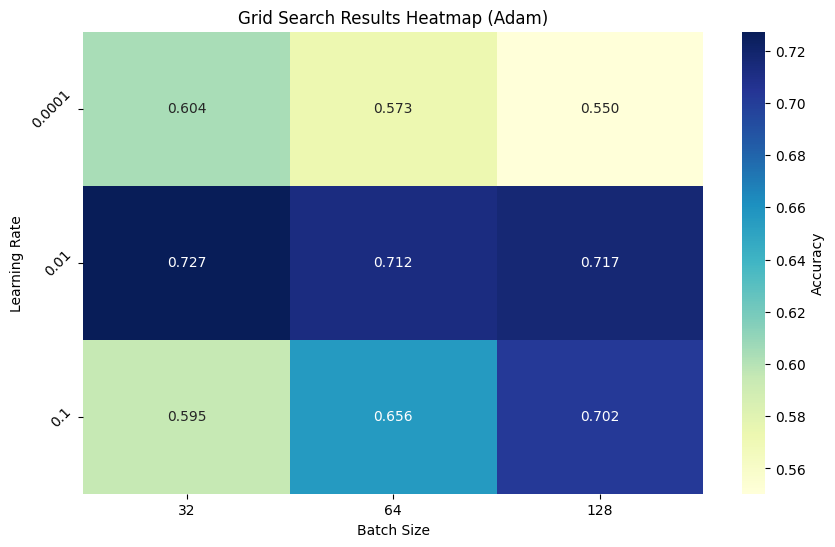

In [312]:
#Validation set on Adam
best_learning_rate = best_result[0]
best_batch_size = best_result[1]

model = create_model(best_learning_rate, "adam")
model.fit(X_train, y_train, epochs=20, batch_size=best_batch_size, verbose=1)
y_val_pred = np.argmax(model.predict(X_val), axis=1)

acc = accuracy_score(y_val, y_val_pred)
cm = confusion_matrix(y_val, y_val_pred)
tp = np.diag(cm)
fp = np.sum(cm, axis=0) - tp
fn = np.sum(cm, axis=1) - tp
tn = np.sum(cm) - (fp + fn + tp)
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
std_accuracy = np.std([result[2] for result in results_adam])

results_adam.append((best_learning_rate, best_batch_size, acc, precision, recall, std_accuracy))

# Print evaluation results
print(f"Validation Accuracy (Adam): {acc:.4f}")
print(f"Confusion Matrix (Adam): \n{cm}")
print(f"True Negatives (Adam): {tn}, False Positives (Adam): {fp}, False Negatives (Adam): {fn}, True Positives (Adam): {tp}")
print(f"Precision (Adam): {precision:.4f}, Recall (Adam): {recall:.4f}")
print(f"Standard Deviation of Accuracies (Adam): {std_accuracy:.4f}")

results_df = pd.DataFrame(results_adam, columns=['Learning Rate', 'Batch Size', 'Accuracy', 'Precision', 'Recall', 'Std Accuracy'])
results_df = results_df.groupby(['Learning Rate', 'Batch Size'], as_index=False).mean()
heatmap_data = results_df.pivot(index='Learning Rate', columns='Batch Size', values='Accuracy')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="YlGnBu", cbar_kws={'label': 'Accuracy'})
plt.title("Grid Search Results Heatmap (Adam)")
plt.xlabel("Batch Size")
plt.ylabel("Learning Rate")
plt.xticks(rotation=0)
plt.yticks(rotation=45)
plt.show()

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5282 - loss: 0.9360
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6660 - loss: 0.7523 
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6876 - loss: 0.6934 
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7062 - loss: 0.6585
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7141 - loss: 0.6362 
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7252 - loss: 0.6154 
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7425 - loss: 0.5974 
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7389 - loss: 0.5880 
Epoch 9/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7450 - loss: 0.5767 
Epoch 10/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7469 - loss: 0.5710 
Epoch 11/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7548 - loss: 0.5635 
Epoch 12/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.

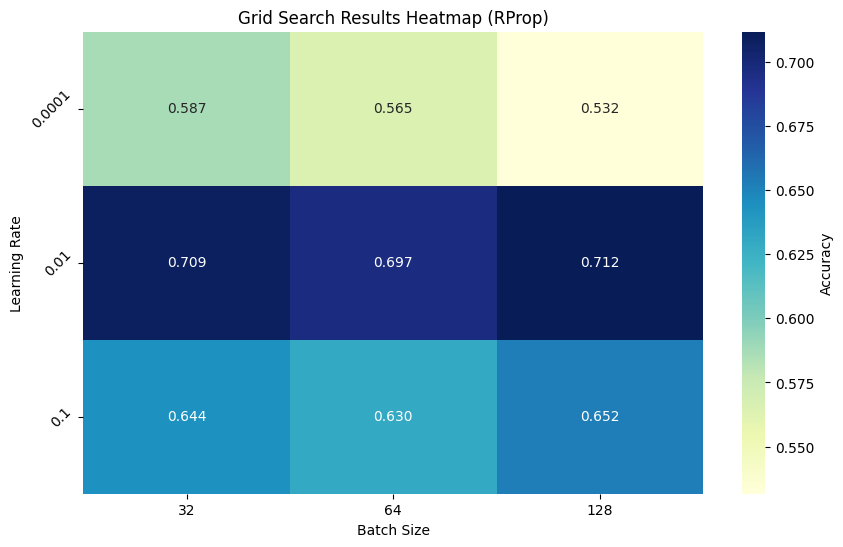

In [308]:
# Validation for RProp
best_learning_rate = best_result[0]
best_batch_size = best_result[1]

model = create_model(best_learning_rate, "rprop")
model.fit(X_train, y_train, epochs=20, batch_size=best_batch_size, verbose=1)
y_val_pred = np.argmax(model.predict(X_val), axis=1)

acc = accuracy_score(y_val, y_val_pred)
cm = confusion_matrix(y_val, y_val_pred)
tp = np.diag(cm)
fp = np.sum(cm, axis=0) - tp
fn = np.sum(cm, axis=1) - tp
tn = np.sum(cm) - (fp + fn + tp)
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
std_accuracy = np.std([result[2] for result in results])


results_rprop.append((best_learning_rate, best_batch_size, acc, precision, recall, std_accuracy))


print(f"Validation Accuracy (RProp): {acc:.4f}")
print(f"Confusion Matrix (RProp): \n{cm}")
print(f"True Negatives (RProp): {tn}, False Positives (RProp): {fp}, False Negatives (RProp): {fn}, True Positives (RProp): {tp}")
print(f"Precision (RProp): {precision:.4f}, Recall (RProp): {recall:.4f}")
print(f"Standard Deviation of Accuracies (RProp): {std_accuracy:.4f}")


results_rprop_df = pd.DataFrame(results_rprop, columns=['Learning Rate', 'Batch Size', 'Accuracy', 'Precision', 'Recall', 'Std Dev'])
results_rprop_df = results_rprop_df.groupby(['Learning Rate', 'Batch Size'], as_index=False).mean()
heatmap_data_rprop = results_rprop_df.pivot(index='Learning Rate', columns='Batch Size', values='Accuracy')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_rprop, annot=True, fmt=".3f", cmap="YlGnBu", cbar_kws={'label': 'Accuracy'})
plt.title("Grid Search Results Heatmap (RProp)")
plt.xlabel("Batch Size")
plt.ylabel("Learning Rate")
plt.xticks(rotation=0)
plt.yticks(rotation=45)
plt.show()

In [309]:
# 1. Evaluate for Adam
best_result_adam = max(results_adam, key=lambda x: x[2])
model_adam = create_model(best_result_adam[0], "adam")
model_adam.fit(X_train, y_train, epochs=20, batch_size=best_result_adam[1], verbose=1)

y_test_pred_adam = np.argmax(model_adam.predict(X_test), axis=1)
test_acc_adam = accuracy_score(y_test, y_test_pred_adam)
test_loss_adam = model_adam.evaluate(X_test, y_test, verbose=0)[0]
test_cm_adam = confusion_matrix(y_test, y_test_pred_adam)
test_tp_adam = np.diag(test_cm_adam)
test_fp_adam = np.sum(test_cm_adam, axis=0) - test_tp_adam
test_fn_adam = np.sum(test_cm_adam, axis=1) - test_tp_adam
test_tn_adam = np.sum(test_cm_adam) - (test_fp_adam + test_fn_adam + test_tp_adam)
test_precision_adam = precision_score(y_test, y_test_pred_adam, average='weighted')
test_recall_adam = recall_score(y_test, y_test_pred_adam, average='weighted')

print("Test Set Evaluation Results for Adam:")
print(f"Test Accuracy: {test_acc_adam:.4f}")
print(f"Test Confusion Matrix:\n{test_cm_adam}")
print(f"True Negatives: {test_tn_adam}, False Positives: {test_fp_adam}, False Negatives: {test_fn_adam}, True Positives: {test_tp_adam}")
print(f"Test Precision: {test_precision_adam:.4f}, Test Recall: {test_recall_adam:.4f}")

# 2. Evaluate for RProp
best_result_rprop = max(results_rprop, key=lambda x: x[2])
model_rprop = create_model(best_result_rprop[0], "rprop")
model_rprop.fit(X_train, y_train, epochs=20, batch_size=best_result_rprop[1], verbose=1)

# Evaluate test set for RProp
y_test_pred_rprop = np.argmax(model_rprop.predict(X_test), axis=1)
test_acc_rprop = accuracy_score(y_test, y_test_pred_rprop)
test_loss_rprop = model_rprop.evaluate(X_test, y_test, verbose=0)[0]
test_cm_rprop = confusion_matrix(y_test, y_test_pred_rprop)
test_tp_rprop = np.diag(test_cm_rprop)
test_fp_rprop = np.sum(test_cm_rprop, axis=0) - test_tp_rprop
test_fn_rprop = np.sum(test_cm_rprop, axis=1) - test_tp_rprop
test_tn_rprop = np.sum(test_cm_rprop) - (test_fp_rprop + test_fn_rprop + test_tp_rprop)
test_precision_rprop = precision_score(y_test, y_test_pred_rprop, average='weighted')
test_recall_rprop = recall_score(y_test, y_test_pred_rprop, average='weighted')

print("Test Set Evaluation Results for RProp:")
print(f"Test Accuracy: {test_acc_rprop:.4f}")
print(f"Test Confusion Matrix:\n{test_cm_rprop}")
print(f"True Negatives: {test_tn_rprop}, False Positives: {test_fp_rprop}, False Negatives: {test_fn_rprop}, True Positives: {test_tp_rprop}")
print(f"Test Precision: {test_precision_rprop:.4f}, Test Recall: {test_recall_rprop:.4f}")

def plot_test_results(test_acc_adam, test_loss_adam, test_acc_rprop, test_loss_rprop):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.bar(['Adam', 'RProp'], [test_acc_adam, test_acc_rprop], color=['blue', 'orange'])
    plt.title('Test Set Accuracy Comparison')
    plt.ylabel('Accuracy')

    plt.subplot(1, 2, 2)
    plt.bar(['Adam', 'RProp'], [test_loss_adam, test_loss_rprop], color=['blue', 'orange'])
    plt.title('Test Set Loss Comparison')
    plt.ylabel('Loss')

    plt.tight_layout()
    plt.show()



Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4480 - loss: 1.0306
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6183 - loss: 0.8492
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6653 - loss: 0.7509
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6846 - loss: 0.6893
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7006 - loss: 0.6560
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7128 - loss: 0.6316
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7180 - loss: 0.6147
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7272 - loss: 0.5932
Epoch 9/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7435 - loss: 0.5824 
Epoch 10/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7463 - loss: 0.5721 
Epoch 11/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7446 - loss: 0.5648
Epoch 12/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7546 - 

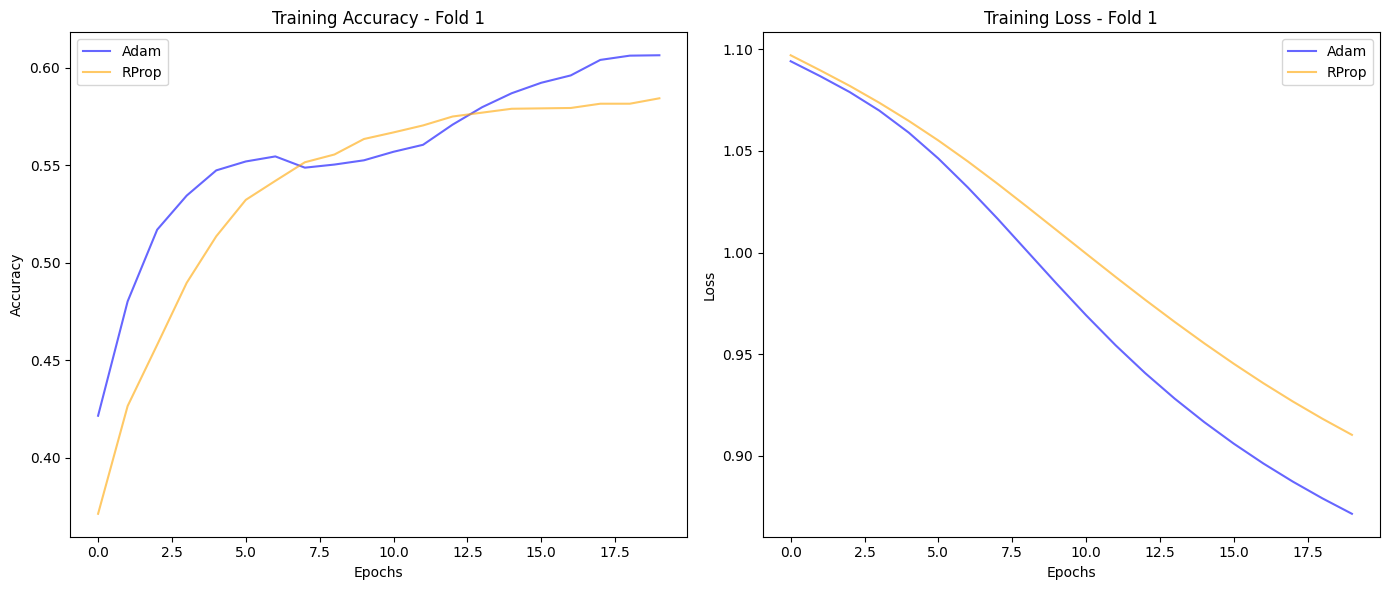

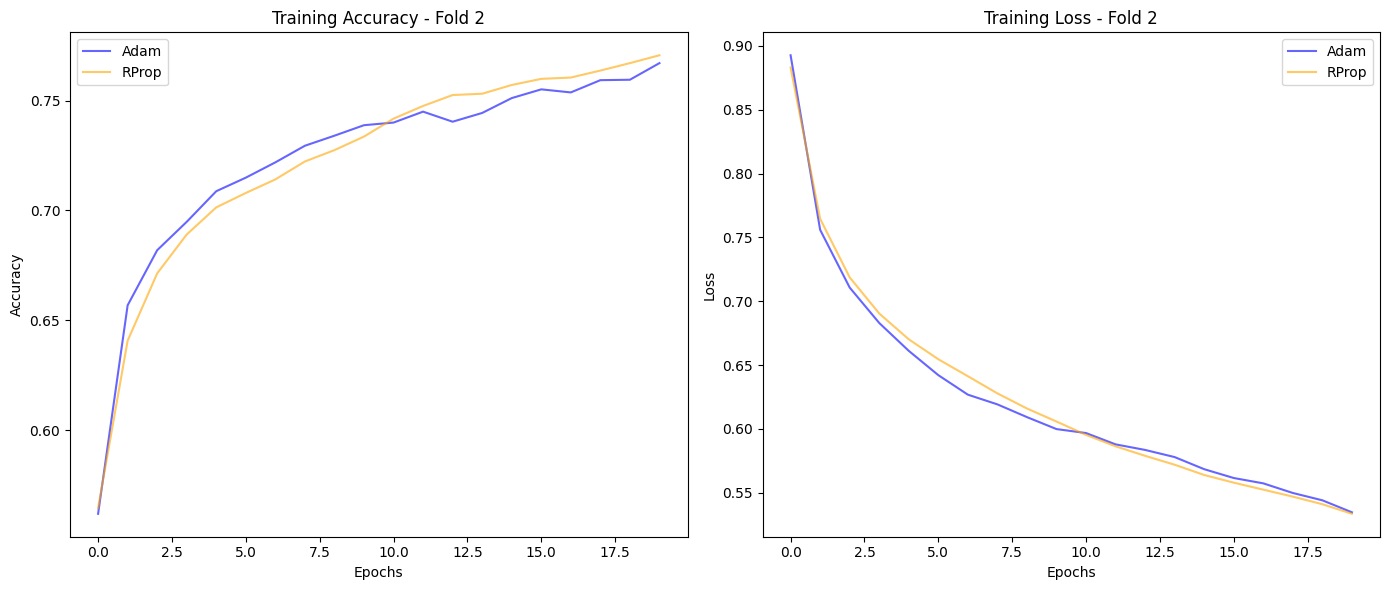

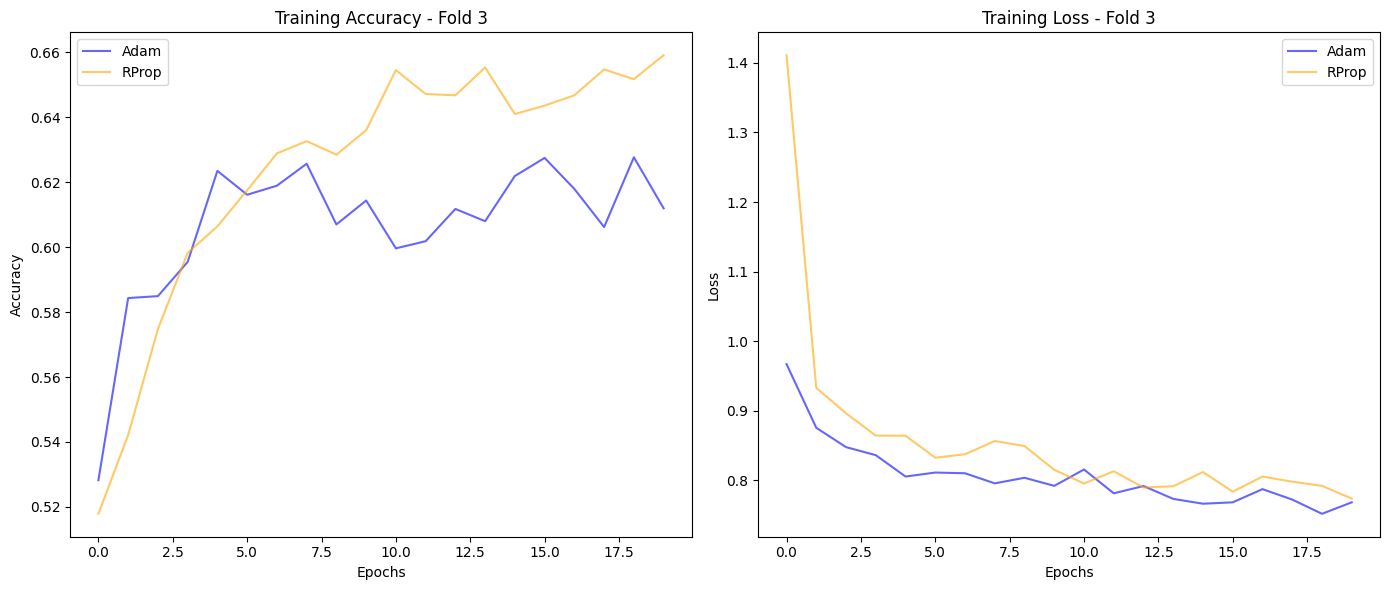

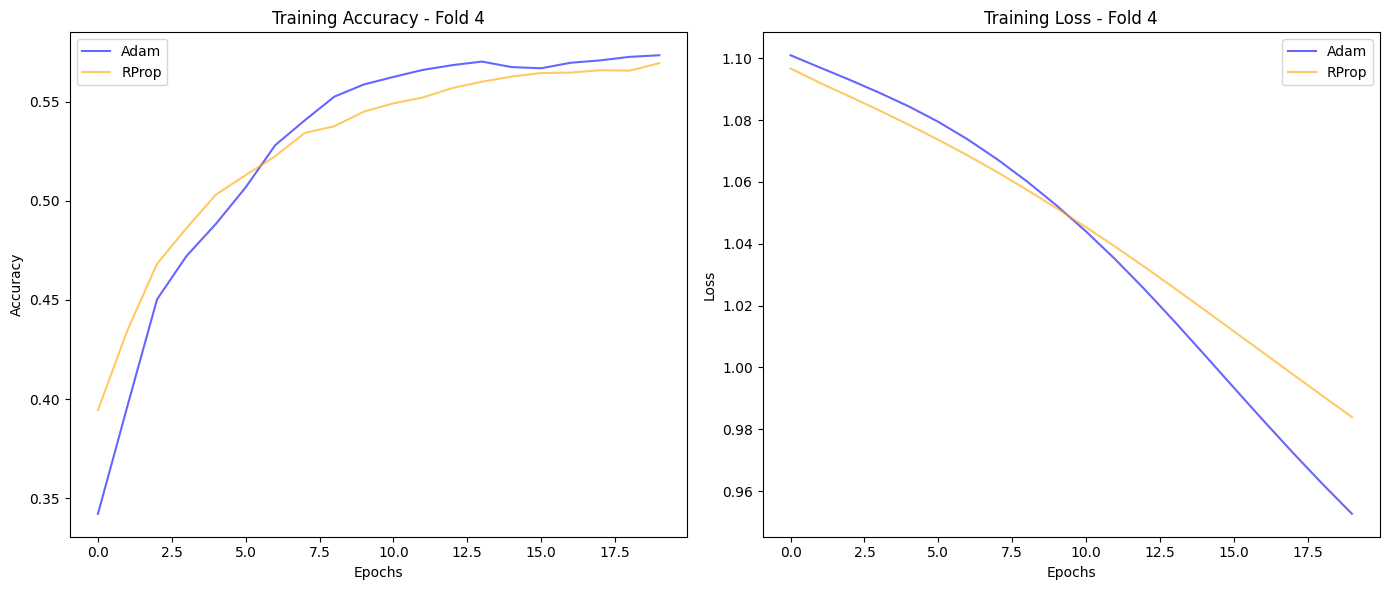

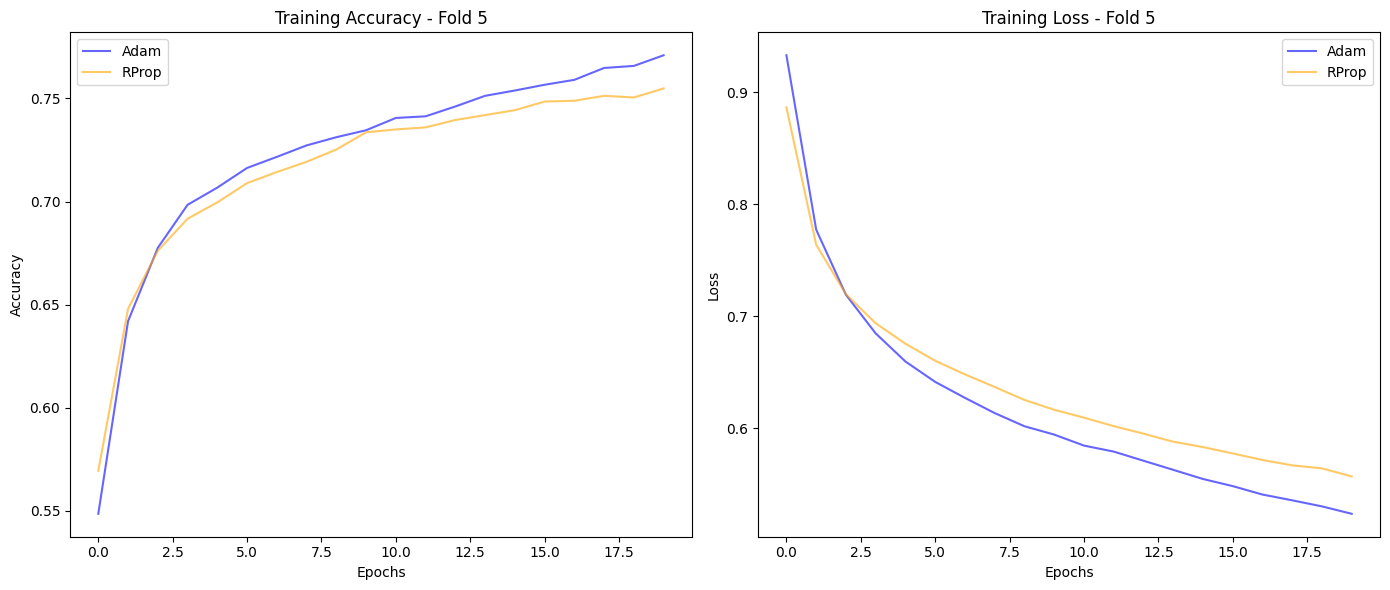

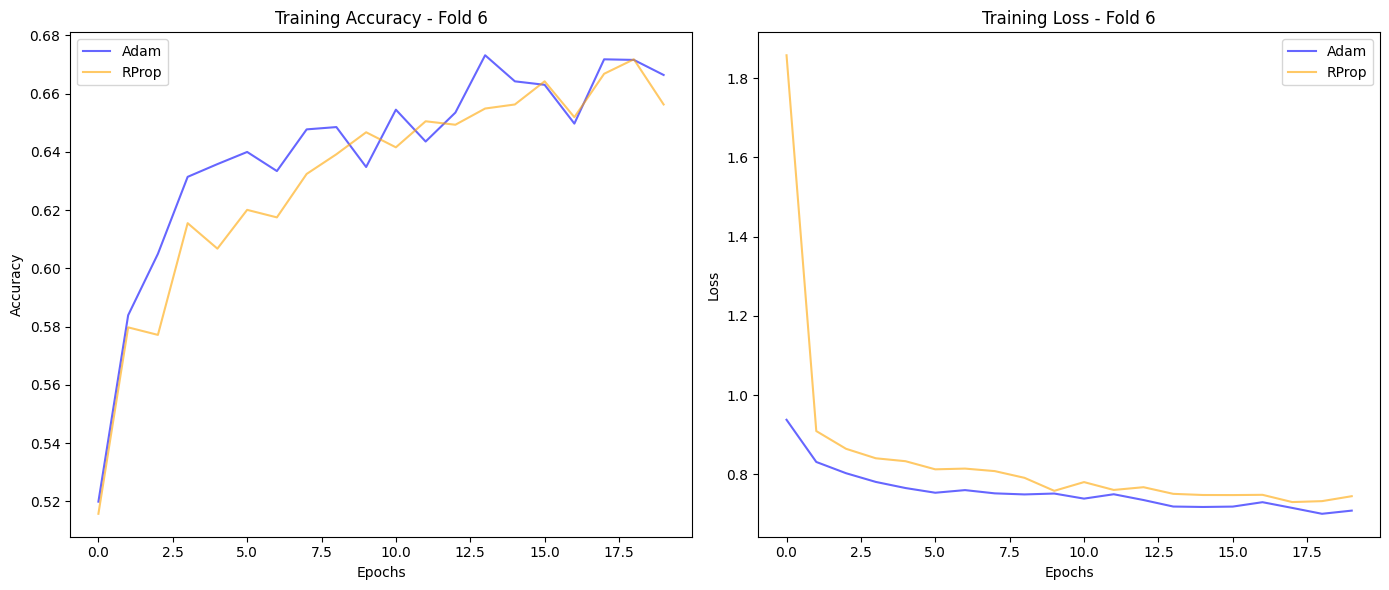

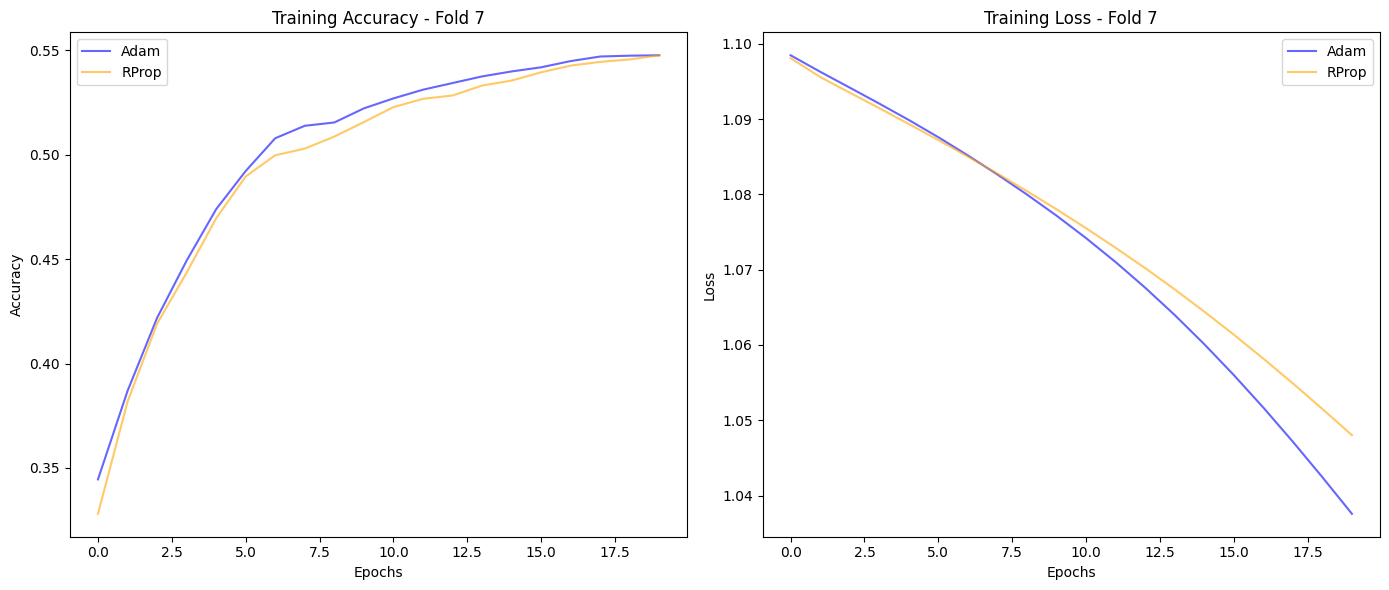

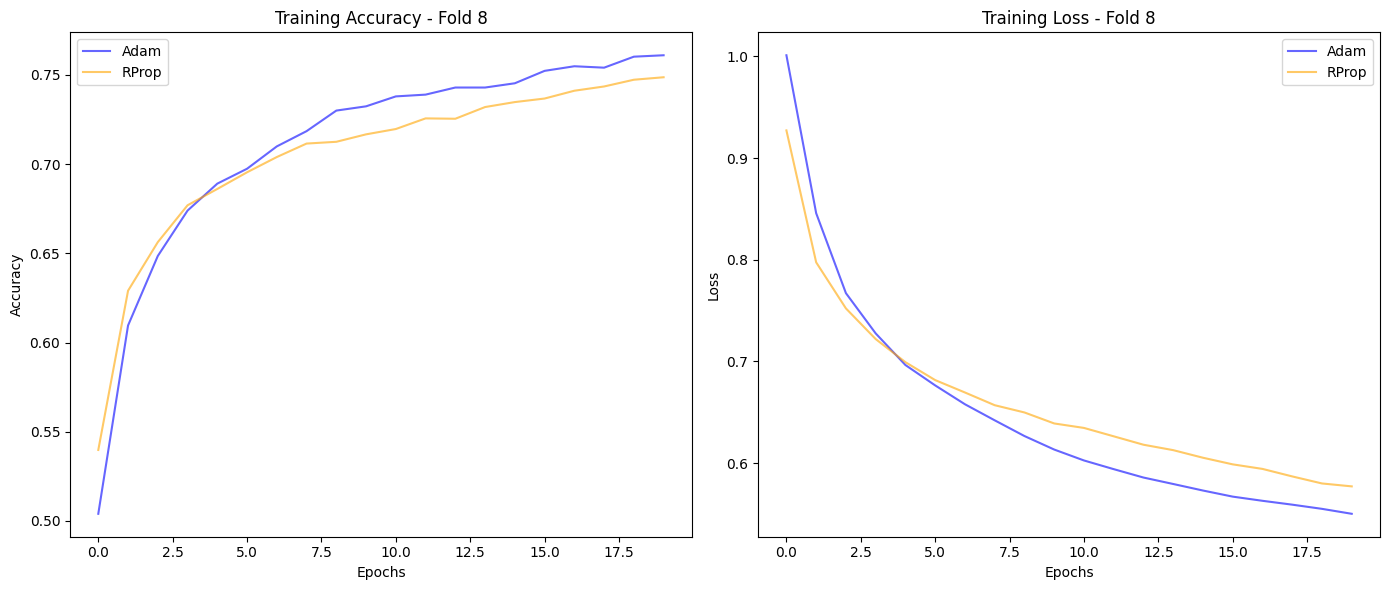

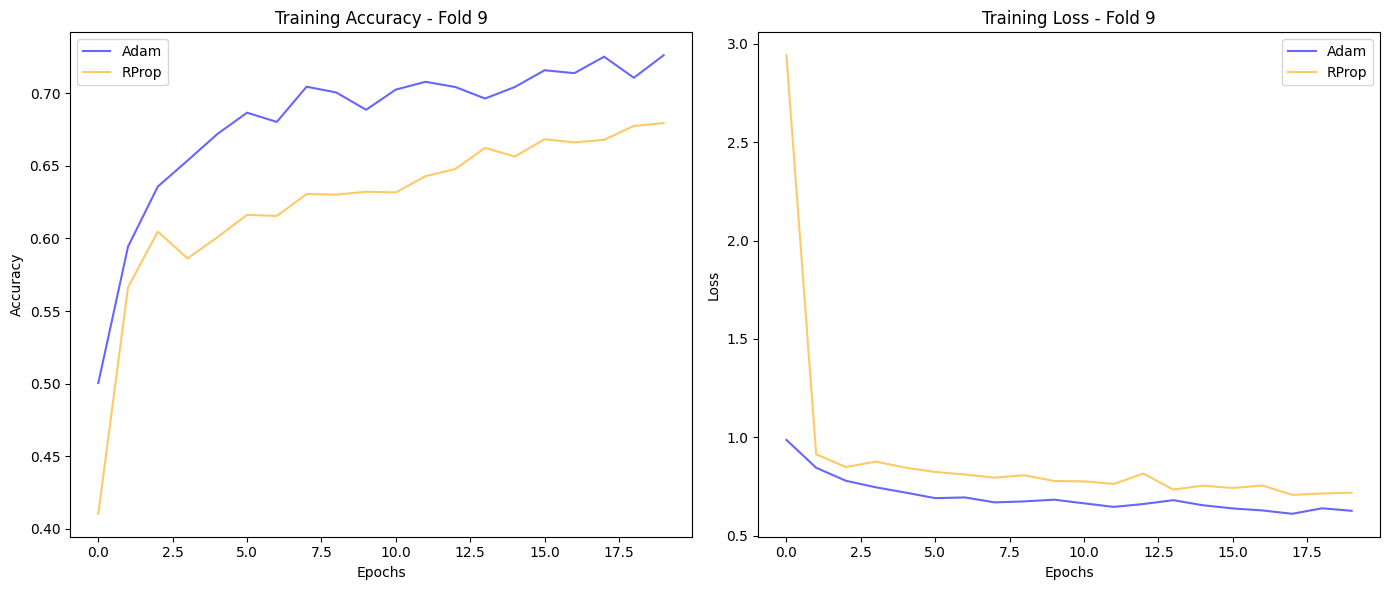

In [310]:
import matplotlib.pyplot as plt

# Function to plot training history for each fold
def plot_training_history_per_fold(adam_accuracy_per_epoch, adam_loss_per_epoch, rprop_accuracy_per_epoch, rprop_loss_per_epoch, epochs):
    num_folds = len(adam_accuracy_per_epoch)

    for i in range(num_folds):
        plt.figure(figsize=(14, 6))

        plt.subplot(1, 2, 1)
        plt.plot(adam_accuracy_per_epoch[i], label='Adam', color='blue', alpha=0.6)
        plt.plot(rprop_accuracy_per_epoch[i], label='RProp', color='orange', alpha=0.6)
        plt.title(f'Training Accuracy - Fold {i+1}')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(adam_loss_per_epoch[i], label='Adam', color='blue', alpha=0.6)
        plt.plot(rprop_loss_per_epoch[i], label='RProp', color='orange', alpha=0.6)
        plt.title(f'Training Loss - Fold {i+1}')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

plot_training_history_per_fold(adam_accuracy_per_epoch, adam_loss_per_epoch, rprop_accuracy_per_epoch, rprop_loss_per_epoch, epochs=20)


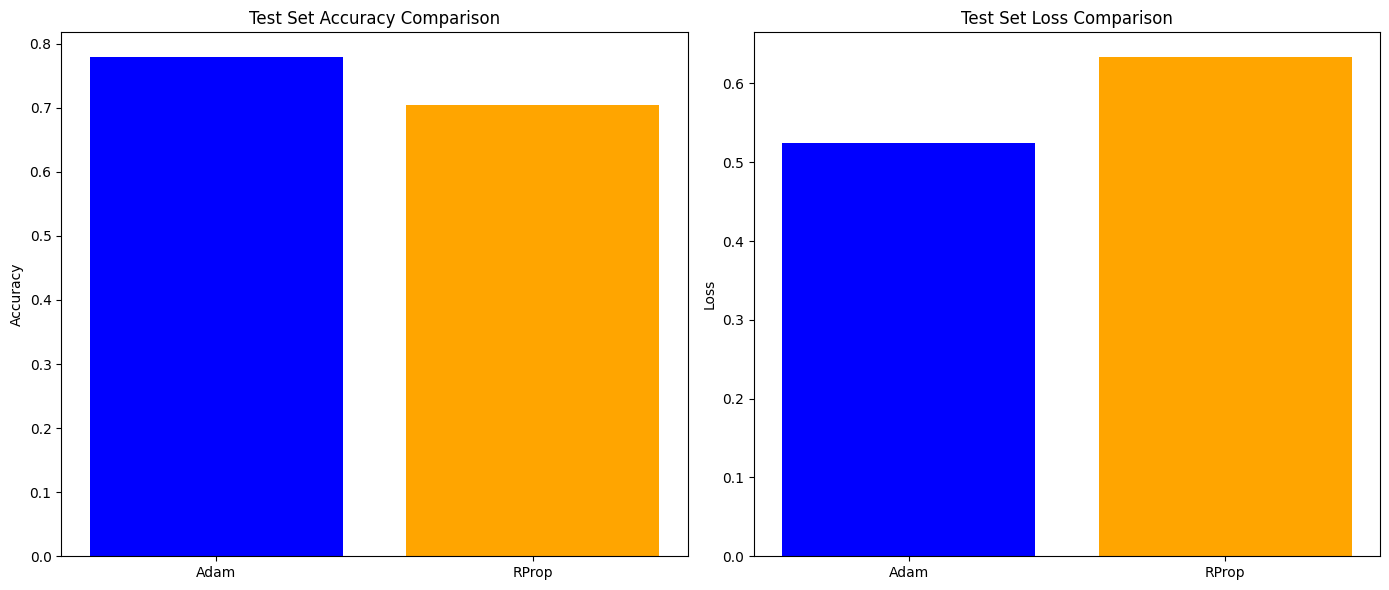

In [311]:
#Test set comparison
plot_test_results(test_acc_adam, test_loss_adam, test_acc_rprop, test_loss_rprop)